In [ ]:

#!pip install --upgrade pip
#!pip install palmerpenguins==0.1.4 numpy pandas seaborn==0.12.1 matplotlib==3.5.3 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.0.2 pyjanitor==0.23.1 session-info

**Importando librerías**

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

**Estableciendo apariencia de los gráficos**

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

**Cargando datos**

In [9]:
raw_penguin_df = palmerpenguins.load_penguins_raw()
raw_penguin_df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [10]:
preprocess_penguin_df = palmerpenguins.load_penguins()
preprocess_penguin_df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


**Tipos de datos de las variables**

In [15]:
preprocess_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Variables por cada tipo dato**

In [16]:
(
    preprocess_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**Cantidad de variables y observaciones**

In [18]:
preprocess_penguin_df.shape

(344, 8)

**¿Existen valores nulos?**

In [20]:
(
    preprocess_penguin_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**¿Cuántos valores nulos tengo por cada variable?**

In [21]:
(
    preprocess_penguin_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**Proporción de valores nulos por cada variable**

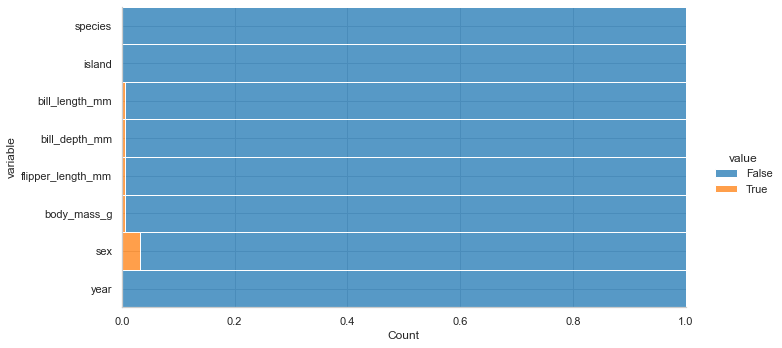

In [25]:
(
    preprocess_penguin_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill',
            aspect=2)
        )
    )
)

**¿Cómo puedo visualizar los valores nulos en todo el conjunto de datos?**

<AxesSubplot:>

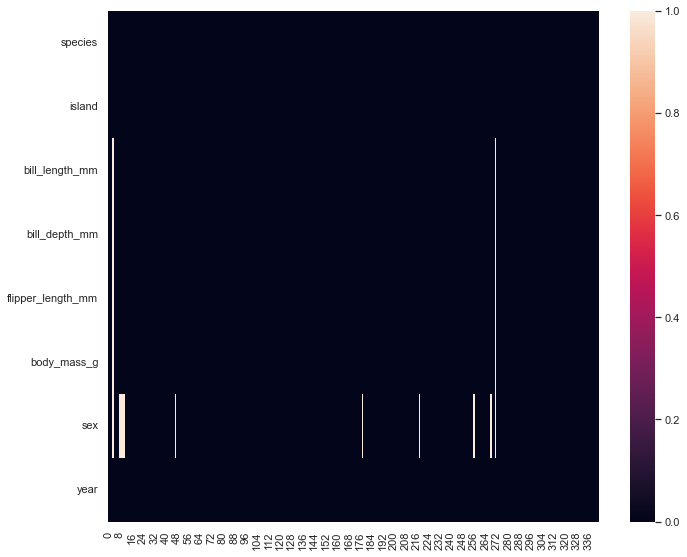

In [29]:
(
    preprocess_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
            data = df
            )
        )
    )
)

Teniendo en cuenta que observamos que la mayoría de datos faltantes provienen de un solo pingûino, 
podemos contemplar la opción de eliminar dichas observaciones del análisis, pero primero es importante
identificar cuántas observaciones perdemos si optamos por este camino.

**¿Cuántas observaciones perdemos si eliminamos los datos faltantes?**

In [32]:
process_penguin_df = (
    preprocess_penguin_df
    .dropna()
)

process_penguin_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


**Conteos y proporciones**

¿Qué estadísticos describen el conjunto de datos?

  
  **Todas las variables**

In [35]:
process_penguin_df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


**Análisis variables numéricas**

In [36]:
process_penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Análisis variables categóricas**

In [37]:
process_penguin_df.describe(include = 'object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


*Convirtiendo mis variables categóricas a tipo categoría*

In [39]:
(
    process_penguin_df
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    }
    )
    .dtypes
)

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

**Visualizando los conteos con pandas**

<AxesSubplot:>

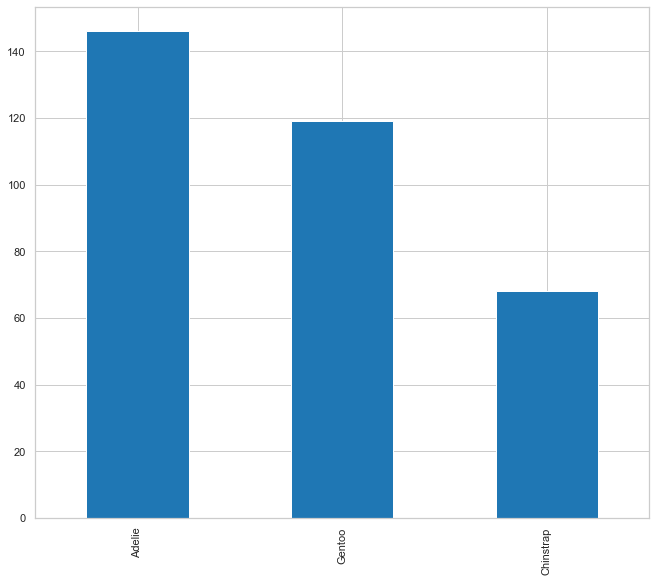

In [40]:
(
    process_penguin_df
    .species
    .value_counts()
    .plot(
    kind= 'bar'
    )
)

**Visualizando los conteos con Seaborn**

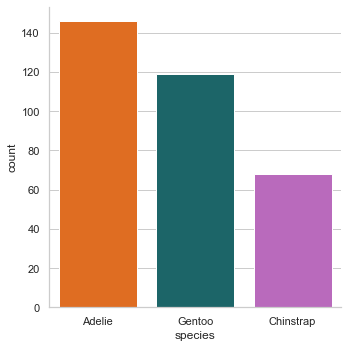

In [42]:
sns.catplot(
    data = process_penguin_df,
    x = 'species',
    kind = 'count',
    palette = penguin_color
)

<AxesSubplot:xlabel='species', ylabel='count'>

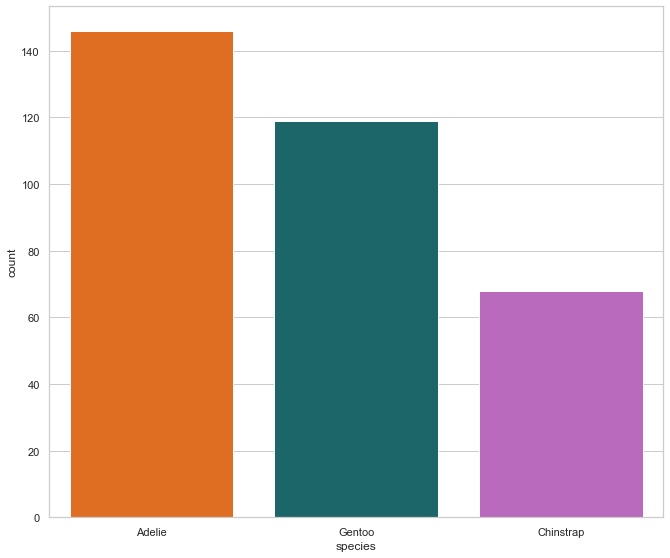

In [44]:
(
    process_penguin_df
    .value_counts('species', sort = True)
    .reset_index(name= 'count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color)
        )
            
        )
)

**¿Cómo visualizamos las proporciones**

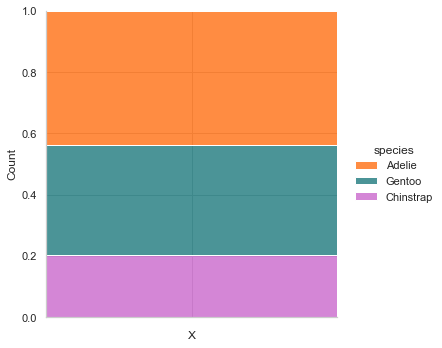

In [46]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = 'X',
                hue = 'species',
                multiple = 'fill',
                palette = penguin_color
            )
        )
    )

)